# 1. Data Wrangling/Exploration

### A. Upload CSV File with COVID-19 Data ...

In [1]:
import pandas as pd

In [2]:
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

df_data_1 = pd.read_csv(body)
df_data_1.head()


,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,...,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,16169f,2,1,04-05-2020,02-05-2020,9999-99-99,97,2,27,97,...,2,2,2,2,2,2,2,2,1,97
1,1009bf,2,1,19-03-2020,17-03-2020,9999-99-99,97,2,24,97,...,2,2,2,2,2,2,2,99,1,97
2,167386,1,2,06-04-2020,01-04-2020,9999-99-99,2,2,54,2,...,2,2,2,2,1,2,2,99,1,2
3,0b5948,2,2,17-04-2020,10-04-2020,9999-99-99,2,1,30,97,...,2,2,2,2,2,2,2,99,1,2
4,0d01b5,1,2,13-04-2020,13-04-2020,22-04-2020,2,2,60,2,...,2,1,2,1,2,2,2,99,1,2


In [3]:
covidPDF = df_data_1

In [4]:
covidPDF.head(3)

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,...,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,16169f,2,1,04-05-2020,02-05-2020,9999-99-99,97,2,27,97,...,2,2,2,2,2,2,2,2,1,97
1,1009bf,2,1,19-03-2020,17-03-2020,9999-99-99,97,2,24,97,...,2,2,2,2,2,2,2,99,1,97
2,167386,1,2,06-04-2020,01-04-2020,9999-99-99,2,2,54,2,...,2,2,2,2,1,2,2,99,1,2


In [5]:
covidPDF.shape

(566602, 23)

### B. Strip Column Names of Extra White Spaces (Front and Back)

In [6]:
covidPDF.columns.str.strip()

Index(['id', 'sex', 'patient_type', 'entry_date', 'date_symptoms', 'date_died',
       'intubed', 'pneumonia', 'age', 'pregnancy', 'diabetes', 'copd',
       'asthma', 'inmsupr', 'hypertension', 'other_disease', 'cardiovascular',
       'obesity', 'renal_chronic', 'tobacco', 'contact_other_covid',
       'covid_res', 'icu'],
      dtype='object')

### C. Drop Columns with Date and ID Data

In [7]:
covidPDF.drop(['entry_date','id','date_symptoms','date_died'],axis = 1, inplace = True)

In [8]:
COLS = covidPDF.columns

In [9]:
COLS = list(COLS)

### D. Look at Count Values for All Columns

In [10]:
for i in range(len(COLS)):
    print(covidPDF.iloc[:,i].value_counts())

2    287112
1    279490
Name: sex, dtype: int64
1    444689
2    121913
Name: patient_type, dtype: int64
97    444689
2     111824
1       9965
99       124
Name: intubed, dtype: int64
2     478416
1      88175
99        11
Name: pneumonia, dtype: int64
30     14604
31     13911
36     13890
38     13847
37     13836
34     13679
32     13631
35     13619
33     13472
29     13411
28     13402
40     13326
39     13287
27     12815
46     12722
41     12606
42     12591
43     12576
45     12522
44     12448
47     12384
48     12130
26     11941
49     11500
50     11228
51     10702
25     10589
52     10426
53      9653
54      9053
       ...  
90       519
91       339
92       272
93       217
95       170
94       161
96       114
97        83
98        68
99        56
100       42
101       17
102       16
103        9
120        7
104        7
109        5
110        3
108        3
106        3
114        2
113        2
107        2
119        2
105        2
118        1
117  

### E. Drop Columns with Largely Incomplete Data

In [11]:
covidPDF.drop(['intubed'],axis = 1, inplace = True)

In [12]:
covidPDF.drop(['icu'],axis = 1, inplace = True)

In [13]:
covidPDF.drop(['contact_other_covid'],axis = 1, inplace = True)

In [14]:
covidPDF.drop(['pregnancy'],axis = 1, inplace = True)

In [15]:
covidPDF.shape

(566602, 15)

In [16]:
covidPDF.columns

Index(['sex', 'patient_type', 'pneumonia', 'age', 'diabetes', 'copd', 'asthma',
       'inmsupr', 'hypertension', 'other_disease', 'cardiovascular', 'obesity',
       'renal_chronic', 'tobacco', 'covid_res'],
      dtype='object')

### F. Clean Column Data for Missing or Null Values

In [17]:
covidPDF = covidPDF[covidPDF['patient_type']<90]

In [18]:
covidPDF = covidPDF[covidPDF['age'] <= 85]

In [19]:
covidPDF = covidPDF[covidPDF['pneumonia']<90]

In [20]:
covidPDF = covidPDF[covidPDF['diabetes']<90]

In [21]:
covidPDF = covidPDF[covidPDF['copd']<90]

In [22]:
covidPDF = covidPDF[covidPDF['asthma']<90]

In [23]:
covidPDF = covidPDF[covidPDF['inmsupr']<90]

In [24]:
covidPDF = covidPDF[covidPDF['hypertension']<90]

In [25]:
covidPDF = covidPDF[covidPDF['other_disease']<90]

In [26]:
covidPDF = covidPDF[covidPDF['cardiovascular']<90]

In [27]:
covidPDF = covidPDF[covidPDF['diabetes']<90]

In [28]:
covidPDF = covidPDF[covidPDF['obesity']<90]

In [29]:
covidPDF = covidPDF[covidPDF['renal_chronic']<90]

In [30]:
covidPDF = covidPDF[covidPDF['tobacco']<90]

In [31]:
covidPDF.shape

(557819, 15)

In [32]:
covidPDF.head()


,sex,patient_type,pneumonia,age,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,covid_res
0,2,1,2,27,2,2,2,2,2,2,2,2,2,2,1
1,2,1,2,24,2,2,2,2,2,2,2,2,2,2,1
2,1,2,2,54,2,2,2,2,2,2,2,1,2,2,1
3,2,2,1,30,2,2,2,2,2,2,2,2,2,2,1
4,1,2,2,60,1,2,2,2,1,2,1,2,2,2,1


#### Changing all feature values to binary (0,1)

In [33]:
BINCOLS = covidPDF.columns[0:3]
BINCOLS = list(BINCOLS)
BINCOLS2 = covidPDF.columns[4:-1]
BINCOLS2 = list(BINCOLS2)
BINCOLS3 = BINCOLS + BINCOLS2
BINCOLS3

['sex',
 'patient_type',
 'pneumonia',
 'diabetes',
 'copd',
 'asthma',
 'inmsupr',
 'hypertension',
 'other_disease',
 'cardiovascular',
 'obesity',
 'renal_chronic',
 'tobacco']

In [34]:
for row in BINCOLS3:
    covidPDF[row].replace(1,0,inplace=True)

In [35]:
for row in BINCOLS3:
    covidPDF[row].replace(2,1,inplace=True)

#### In Label Column change 1, 2, 3 to 0, 1, 2 ...

In [36]:
covidPDF.iloc[:,-1].replace(1,0,inplace=True)

In [37]:
covidPDF.iloc[:,-1].replace(2,1,inplace=True)

In [38]:
covidPDF.iloc[:,-1].replace(3,2,inplace=True)

In [39]:
covidPDF.iloc[:,-1].value_counts()

1    275135
0    216916
2     65768
Name: covid_res, dtype: int64

### G. Statistical Analysis on Data (Measures and Correlation)

In [40]:
from scipy.stats import *
LENGTH = len(covidPDF.columns)
for i in range(0,LENGTH-1):
    print('Statistics for Feature ',covidPDF.columns[i])
    stat = covidPDF.iloc[:,i].max()
    print('Max = ', stat)
    stat = covidPDF.iloc[:,i].min()
    print('Min = ', stat)
    stat = covidPDF.iloc[:,i].mean()
    print('Mean = ', stat)
    stat = covidPDF.iloc[:,i].skew()
    print('Skewness = ', stat)
    stat = covidPDF.iloc[:,i].kurtosis()
    print('Kurtosis = ', stat)
    print('------------------------------------------------------\n')

Statistics for Feature  sex
Max =  1
Min =  0
Mean =  0.5063380774050364
Skewness =  -0.02535441491152254
Kurtosis =  -1.9993643221629827
------------------------------------------------------

Statistics for Feature  patient_type
Max =  1
Min =  0
Mean =  0.210268922356535
Skewness =  1.4219983301760037
Kurtosis =  0.022079330173551792
------------------------------------------------------

Statistics for Feature  pneumonia
Max =  1
Min =  0
Mean =  0.8480170091015186
Skewness =  -1.938794856141714
Kurtosis =  1.7589318006494103
------------------------------------------------------

Statistics for Feature  age
Max =  85
Min =  0
Mean =  42.17663077091314
Skewness =  0.17836154090750053
Kurtosis =  -0.07357439381197883
------------------------------------------------------

Statistics for Feature  diabetes
Max =  1
Min =  0
Mean =  0.8760673264983803
Skewness =  -2.2826278685509678
Kurtosis =  3.2104014968217918
------------------------------------------------------

Statistics for Fe

### Statistical data indicates that conditions such as tuberculosis, pneumonia, copd, diabetes lend themselves to a much higher likelihood of patient developing COVID-19. In particular, the heavy skew and kurtosis values for features such as COPD, Cardiovascular and Renal Chronic indicate that these patient conditions lend themselves highly to a greater chance of contacting COVID-19.

### H. Some Data Visualizations Betweeen Age and Infected Patients

In [41]:
C1 = covidPDF[covidPDF['covid_res']==0]
C2 = covidPDF[covidPDF['covid_res']==1]
C3 = covidPDF[covidPDF['covid_res']==2]

In [42]:
C1 = C1['age'].sample(n=100,random_state=1)
C2 = C2['age'].sample(n=100,random_state=1)
C3 = C3['age'].sample(n=100,random_state=1)

In [43]:
from matplotlib import pyplot as plt

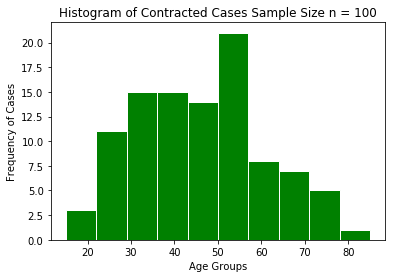

In [44]:
plt.hist(C1,color = 'green',edgecolor='white')
plt.xlabel('Age Groups')
plt.ylabel('Frequency of Cases')
plt.title('Histogram of Contracted Cases Sample Size n = 100')
plt.show()

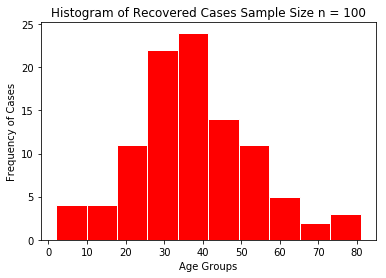

In [45]:
plt.hist(C2,color = 'red', edgecolor='white')
plt.xlabel('Age Groups')
plt.ylabel('Frequency of Cases')
plt.title('Histogram of Recovered Cases Sample Size n = 100')
plt.show()

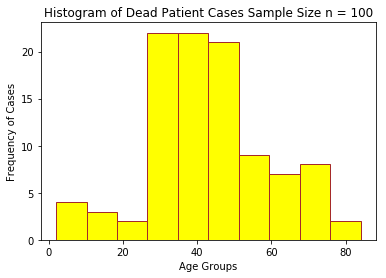

In [46]:
plt.hist(C3,color = 'yellow', edgecolor='brown')
plt.xlabel('Age Groups')
plt.ylabel('Frequency of Cases')
plt.title('Histogram of Dead Patient Cases Sample Size n = 100')
plt.show()

# 2. Modeling Using Apache Spark ML

### A. Set up Requirements

In [47]:
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown('# <span style="color:green">'+string+'</span>'))


if ('sc' in locals() or 'sc' in globals()):
    printmd('<<<<<!!!!! It seems that you are running in a IBM Watson Studio Apache Spark Notebook. Please run it in an IBM Watson Studio Default Runtime (without Apache Spark) !!!!!>>>>>')
else:
    printmd("All is Fine -- Proceed!")

# <span style="color:green">All is Fine -- Proceed!</span>

In [48]:
!pip install pyspark==2.4.5

     |████████████████████████████████| 217.8MB 167kB/s  eta 0:00:01███▋   | 195.1MB 66.4MB/s eta 0:00:01
     |████████████████████████████████| 204kB 33.1MB/s eta 0:00:01
  Stored in directory: /home/dsxuser/.cache/pip/wheels/bf/db/04/61d66a5939364e756eb1c1be4ec5bdce6e04047fc7929a3c3c
Successfully built pyspark


In [49]:
try:
    from pyspark import SparkContext, SparkConf
    from pyspark.sql import SparkSession
    printmd("All Libraries Imported OK")
except ImportError as e:
    printmd('<<<<<!!!!! Please restart your kernel after installing Apache Spark !!!!!>>>>>')

# <span style="color:green">All Libraries Imported OK</span>

In [50]:
sc = SparkContext.getOrCreate(SparkConf().setMaster("local[*]"))

spark = SparkSession \
    .builder \
    .getOrCreate()

In [51]:
#covidPDF['age'] = (covidPDF['age']-covidPDF['age'].mean())/covidPDF['age'].std()
covidPDF['age'] /= covidPDF['age'].max()

In [52]:
covidPDF['age'].mean()

0.4961956561283277

### B. Set Up Spark Data Frame

In [53]:
covidSDF = spark.createDataFrame(covidPDF)

In [54]:
len(covidSDF.columns)

15

In [55]:
covidSDF.columns

['sex',
 'patient_type',
 'pneumonia',
 'age',
 'diabetes',
 'copd',
 'asthma',
 'inmsupr',
 'hypertension',
 'other_disease',
 'cardiovascular',
 'obesity',
 'renal_chronic',
 'tobacco',
 'covid_res']

### C. Use Decision Tree Multi-Classifier Machine Learning Algorithm with MulticlassClassification Evaluator ''Accuracy'' Metric

In [56]:
inputCols = covidSDF.columns[0:-1]

In [57]:
from pyspark.ml.feature import VectorAssembler
vectorAssembler = VectorAssembler(inputCols = inputCols, outputCol = "features")

In [58]:
from pyspark.ml.classification import DecisionTreeClassifier as DTC

In [59]:
dt = DTC(labelCol="covid_res", featuresCol="features")

In [60]:
from pyspark.ml import Pipeline
pipeline = Pipeline(stages=[vectorAssembler, dt])

### Using 80-20 Random Splitting

In [61]:
SPLITS = covidSDF.randomSplit([0.7,0.3])

In [62]:
covidSDF_Train = SPLITS[0]
covidSDF_Test = SPLITS[1]

In [63]:
model = pipeline.fit(covidSDF_Train)

In [64]:
predictions = model.transform(covidSDF_Test)

In [65]:
predictions.select("prediction", "covid_res", "features").show(5)

+----------+---------+--------------------+
|prediction|covid_res|            features|
+----------+---------+--------------------+
|       1.0|        0|[0.0,0.0,0.0,0.01...|
|       1.0|        1|[0.0,0.0,0.0,0.02...|
|       1.0|        0|[0.0,0.0,0.0,0.03...|
|       1.0|        1|[0.0,0.0,0.0,0.03...|
|       1.0|        0|[0.0,0.0,0.0,0.11...|
+----------+---------+--------------------+
only showing top 5 rows



In [68]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator as MCCE

In [69]:
evaluator = MCCE(labelCol="covid_res", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print("Test Error = %g " % (1.0 - accuracy))

Test Error = 0.443965 


In [71]:
binEval = MCCE().setMetricName("accuracy").setPredictionCol("prediction").setLabelCol("covid_res")
    
binEval.evaluate(predictions) 

print("Percentage Accuracy = %.2f" % (100*binEval.evaluate(predictions)))

Percentage Accuracy = 55.60


### D. Using Random Forest Classifier that uses Bootstrapping Algorithm (BAGGING)

In [109]:
from pyspark.ml.classification import RandomForestClassifier as RFC

In [110]:
rft = RFC(labelCol="covid_res", featuresCol="features")

In [111]:
pipeline = Pipeline(stages=[vectorAssembler, rft])

In [112]:
covidSDF_Train = SPLITS[0]
covidSDF_Test = SPLITS[1]

In [113]:
model = pipeline.fit(covidSDF_Train)

In [114]:
predictions = model.transform(covidSDF_Test)

In [115]:
evaluator = MulticlassClassificationEvaluator(labelCol="covid_res", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print("Test Error = %g " % (1.0 - accuracy))

Test Error = 0.442638 


In [116]:
predictions.select("prediction", "covid_res", "features").show(20)

+----------+---------+--------------------+
|prediction|covid_res|            features|
+----------+---------+--------------------+
|       1.0|        1|[1.0,1.0,1.0,-2.5...|
|       1.0|        1|[1.0,1.0,1.0,-2.5...|
|       1.0|        1|[1.0,1.0,1.0,-2.4...|
|       1.0|        1|[1.0,1.0,1.0,-2.4...|
|       1.0|        1|[1.0,1.0,1.0,-2.3...|
|       1.0|        0|[1.0,1.0,1.0,-2.2...|
|       1.0|        0|[1.0,1.0,1.0,-1.9...|
|       1.0|        0|[1.0,1.0,1.0,-1.9...|
|       1.0|        0|[1.0,1.0,1.0,-1.8...|
|       1.0|        0|[1.0,1.0,1.0,-1.7...|
|       1.0|        0|[1.0,1.0,1.0,-1.7...|
|       1.0|        0|[1.0,1.0,1.0,-1.6...|
|       0.0|        0|[1.0,1.0,1.0,-1.5...|
|       0.0|        0|[1.0,1.0,1.0,-1.5...|
|       1.0|        0|[1.0,1.0,1.0,-1.5...|
|       1.0|        0|[1.0,1.0,1.0,-1.4...|
|       1.0|        0|[1.0,1.0,1.0,-1.4...|
|       0.0|        0|[1.0,1.0,1.0,-1.3...|
|       1.0|        0|[1.0,1.0,1.0,-1.3...|
|       1.0|        0|[1.0,1.0,1

# 3. PCA Dimensionality Reduction

In [59]:
from pyspark.ml.feature import PCA
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler

In [60]:
assembler = VectorAssembler(inputCols = covidSDF.columns[0:-1], outputCol="features")

In [62]:
covidSDF2 = covidSDF.collect()[:][0:-1]

In [64]:
type(covidSDF2)

list

In [66]:
features = assembler.transform(spark.createDataFrame(covidSDF2))

In [71]:
features.rdd.map(lambda r : r.features).take(10)

[DenseVector([1.0, 0.0, 1.0, 0.3176, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]),
 DenseVector([1.0, 0.0, 1.0, 0.2824, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]),
 DenseVector([0.0, 1.0, 1.0, 0.6353, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0]),
 DenseVector([1.0, 1.0, 0.0, 0.3529, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]),
 DenseVector([0.0, 1.0, 1.0, 0.7059, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0]),
 DenseVector([1.0, 1.0, 0.0, 0.5529, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]),
 DenseVector([1.0, 1.0, 1.0, 0.7412, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0]),
 DenseVector([0.0, 0.0, 1.0, 0.6588, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0]),
 DenseVector([0.0, 0.0, 1.0, 0.4824, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]),
 DenseVector([0.0, 1.0, 0.0, 0.4588, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0])]

In [72]:
pca = PCA(k=3, inputCol="features", outputCol="pcaFeatures")
model = pca.fit(features)

In [73]:
result_pca = model.transform(features).select("pcaFeatures")
result_pca.show(truncate=False)

+-------------------------------------------------------------+
|pcaFeatures                                                  |
+-------------------------------------------------------------+
|[0.9737783980833634,1.6420637520289565,1.1004930786523286]   |
|[0.9792791416333442,1.6447917148993767,1.1030240894310046]   |
|[0.5991961872145695,0.3642109676696704,0.9414204303851526]   |
|[-0.11291030642141694,1.2518489891402518,1.8126486061933396] |
|[0.062578972232902,0.07616457897838727,0.7756473074437888]   |
|[-0.43282277192250995,1.0597524839137,1.5269637013046948]    |
|[-0.021753684531048603,1.1729123496761726,0.9633245965810924]|
|[0.9094745929426402,0.5325818469748895,0.5865188108220118]   |
|[1.3560888122730614,0.7284206875708822,1.2055859071873372]   |
|[0.14500699726576305,0.2045591869212198,1.288264097703313]   |
|[0.2657329454016273,0.33638728276856433,1.9160540942092308]  |
|[1.3487544875397537,0.7247834037436552,1.2022112261491025]   |
|[0.37244976364394755,1.4269592261544173

In [74]:
result_pca.count()

557818

In [82]:
x = result_pca.rdd.map(lambda row : row.pcaFeatures[0]).collect()
y = result_pca.rdd.map(lambda row : row.pcaFeatures[1]).collect()
z = result_pca.rdd.map(lambda row : row.pcaFeatures[2]).collect()

In [85]:
import random

In [86]:
x = random.sample(x,100)

In [87]:
y = random.sample(y, 100)
z = random.sample(z, 100)

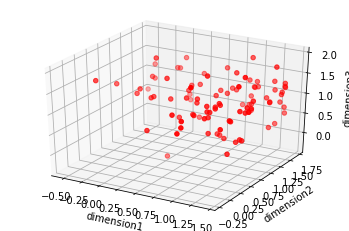

In [90]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')




ax.scatter(x,y,z, c='r', marker='o')

ax.set_xlabel('dimension1')
ax.set_ylabel('dimension2')
ax.set_zlabel('dimension3')

plt.show()

## NOT A WHOLE LOT OF CLUSTERING ... FEATURES ARE PRETTY SPREAD OUT !!!
## 